In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 

In [2]:
def plot_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))

    plt.plot(in_seq)
    plt.plot(tar_seq)
    plt.plot(predicted_seq)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['input_seq', 'target_seq', 'pre_seq'], loc='upper right')
    axes = plt.gca()
    fig_predict = plt.figure(figsize=ts)
    plt.show()  

In [7]:
hist = pd.read_csv("results/PCA_LSTM_60secs.csv", index_col='Unnamed: 0')
hist.head()

,Loss,Validation Loss
0,0.049834,0.113040
1,0.043017,0.107923
2,0.040322,0.096565
3,0.040997,0.095375
4,0.038978,0.109654


<AxesSubplot:>

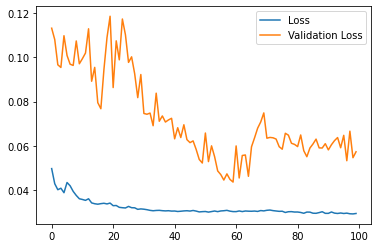

In [8]:
hist.plot()

In [10]:
from keras.models import load_model

model = load_model("models/PCA_LSTM_60secs")